In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
#Loading the data
df = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Student prediction data\students.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

The dataset contains a total of 37 columns with 4424 rows. There are no missing values. The description of the dataset can be found here : https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [4]:
# Understanding the distribution of the categorical variable in our dataset
data_unique = df.select_dtypes(exclude='float')
for col in data_unique.columns:
    print(f"{col} : {data_unique[col].value_counts().nunique()}\n")

Marital status : 6

Application mode : 16

Application order : 7

Course : 15

Daytime/evening attendance	 : 2

Previous qualification : 16

Nacionality : 8

Mother's qualification : 17

Father's qualification : 18

Mother's occupation : 22

Father's occupation : 21

Displaced : 2

Educational special needs : 2

Debtor : 2

Tuition fees up to date : 2

Gender : 2

Scholarship holder : 2

Age at enrollment : 37

International : 2

Curricular units 1st sem (credited) : 17

Curricular units 1st sem (enrolled) : 22

Curricular units 1st sem (evaluations) : 27

Curricular units 1st sem (approved) : 23

Curricular units 1st sem (without evaluations) : 10

Curricular units 2nd sem (credited) : 17

Curricular units 2nd sem (enrolled) : 17

Curricular units 2nd sem (evaluations) : 22

Curricular units 2nd sem (approved) : 18

Curricular units 2nd sem (without evaluations) : 10

Target : 3



In [5]:
data_unique['Application mode'].value_counts()

Application mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


This is a result of the descriptive statistics. It shows that most of columns here are categorical. For the numerical columns, the previous qualification column shows that the mean is 4.58, but with a high standard deviation, implying a variety of prior qualifications. For the admission grade column, the mean is 126.98 with a fairly narrow range, suggesting students have relatively similar grades.

In [7]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

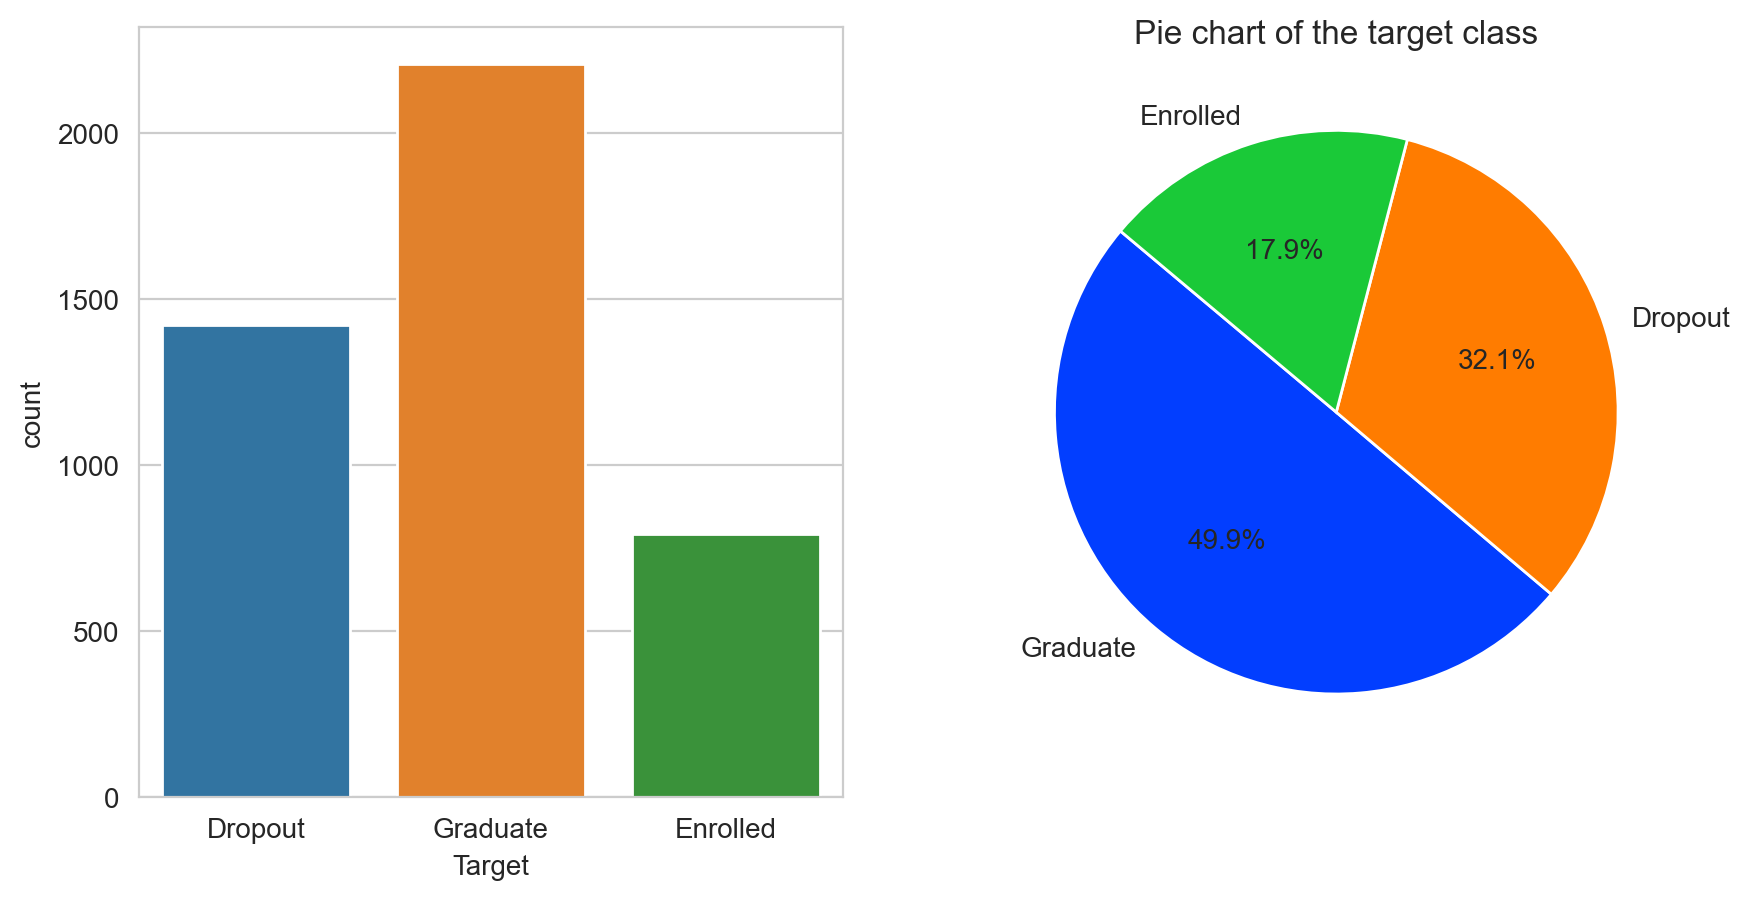

<Figure size 800x600 with 0 Axes>

In [8]:
#Visualizing the distribution of the target class using countplot and pie chart.
f,ax = plt.subplots(1,2,figsize=(10,5),dpi=200)
sns.countplot(data=df,x='Target',ax=ax[0])

plt.figure(figsize=(8, 6))
palette_color = sns.color_palette('bright') 
ax[1].pie(df['Target'].value_counts(), labels=df['Target'].value_counts().index, autopct='%1.1f%%',startangle=140, colors=palette_color)
ax[1].set_title('Pie chart of the target class')
plt.show()

Student who graduated are higher than students who are dropout or enrolled. The result shows that there is class imbalance.

# INSIGHT INTO THE DISTRIBUTION OF THE COLUMNS

In [9]:
df_dist = df.select_dtypes('float')

In [10]:
df_dist.columns=df_dist.columns.str.replace(' ','_')

In [11]:
df_dist

,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade),Unemployment_rate,Inflation_rate,GDP
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79
...,...,...,...,...,...,...,...
4419,125.0,122.2,13.600000,12.666667,15.5,2.8,-4.06
4420,120.0,119.0,12.000000,11.000000,11.1,0.6,2.02
4421,154.0,149.5,14.912500,13.500000,13.9,-0.3,0.79
4422,180.0,153.8,13.800000,12.000000,9.4,-0.8,-3.12


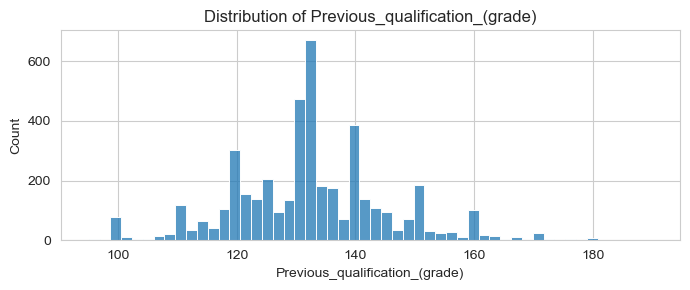

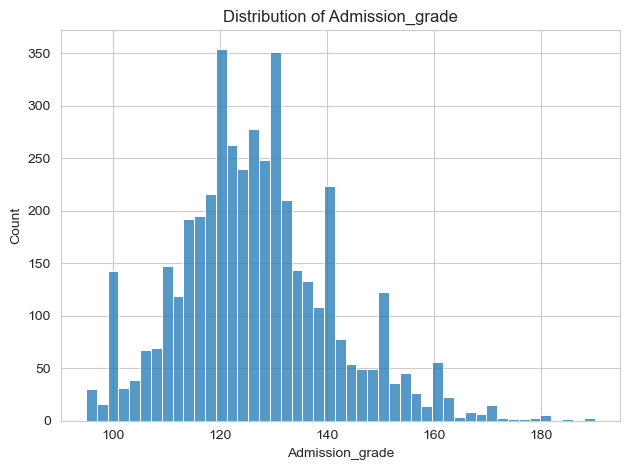

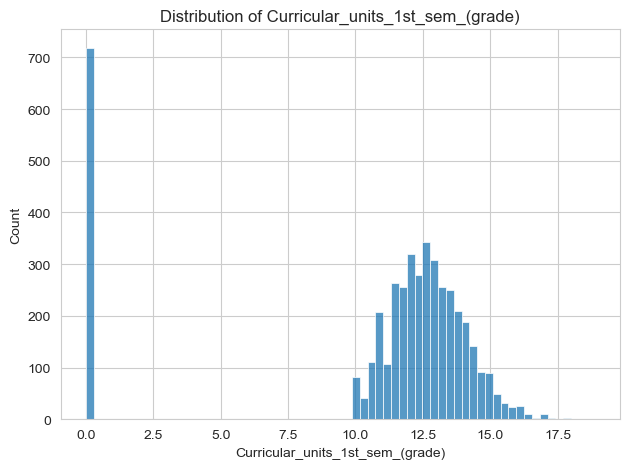

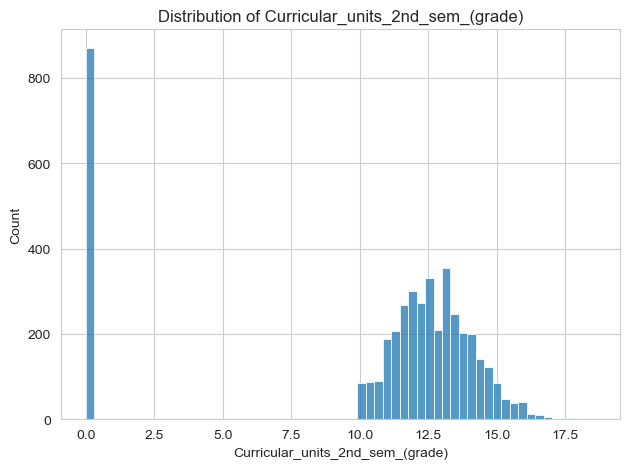

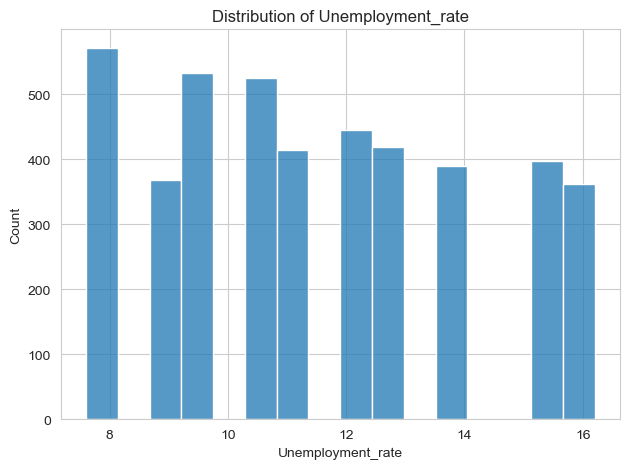

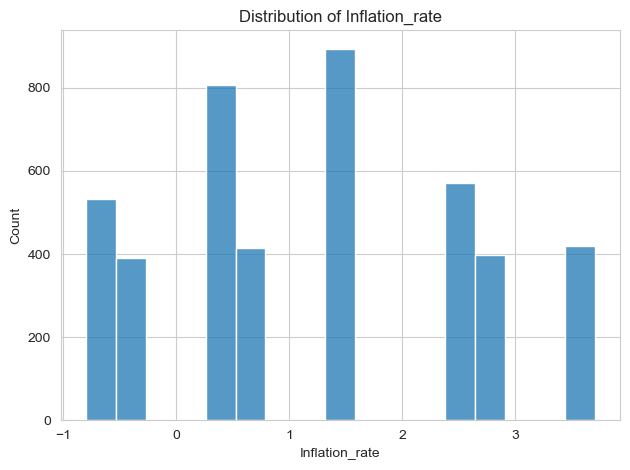

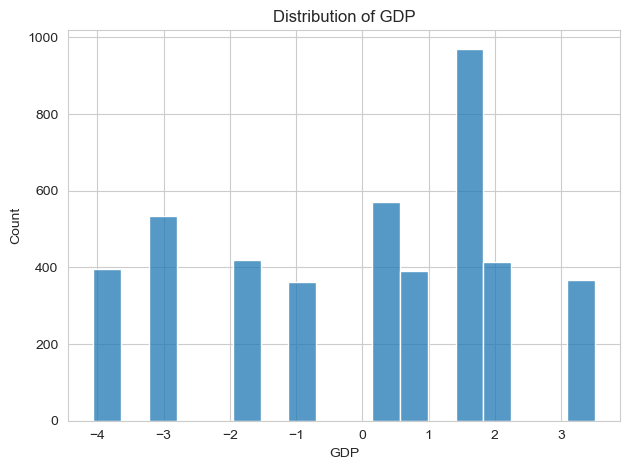

In [12]:
plt.figure(figsize=(7,3))
for a in df_dist.columns:
    sns.histplot(df_dist[a])
    plt.title(f'Distribution of {a}')
    plt.tight_layout()
    plt.show()

<Axes: >

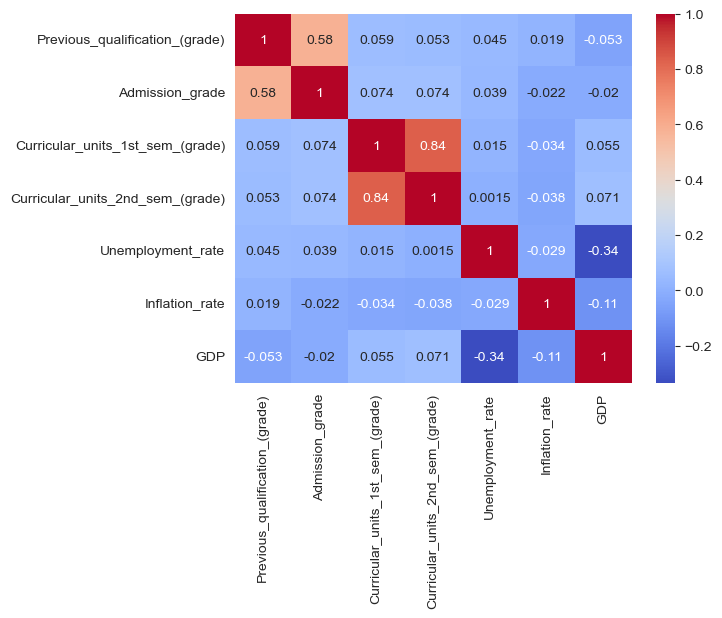

In [13]:
sns.heatmap(df_dist.corr(),annot=True,cmap='coolwarm')

In [14]:
corr_df = df[['Previous qualification (grade)', 'Admission grade',
       'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
       'Unemployment rate', 'Inflation rate', 'GDP','Target']]

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_6248\877379580.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


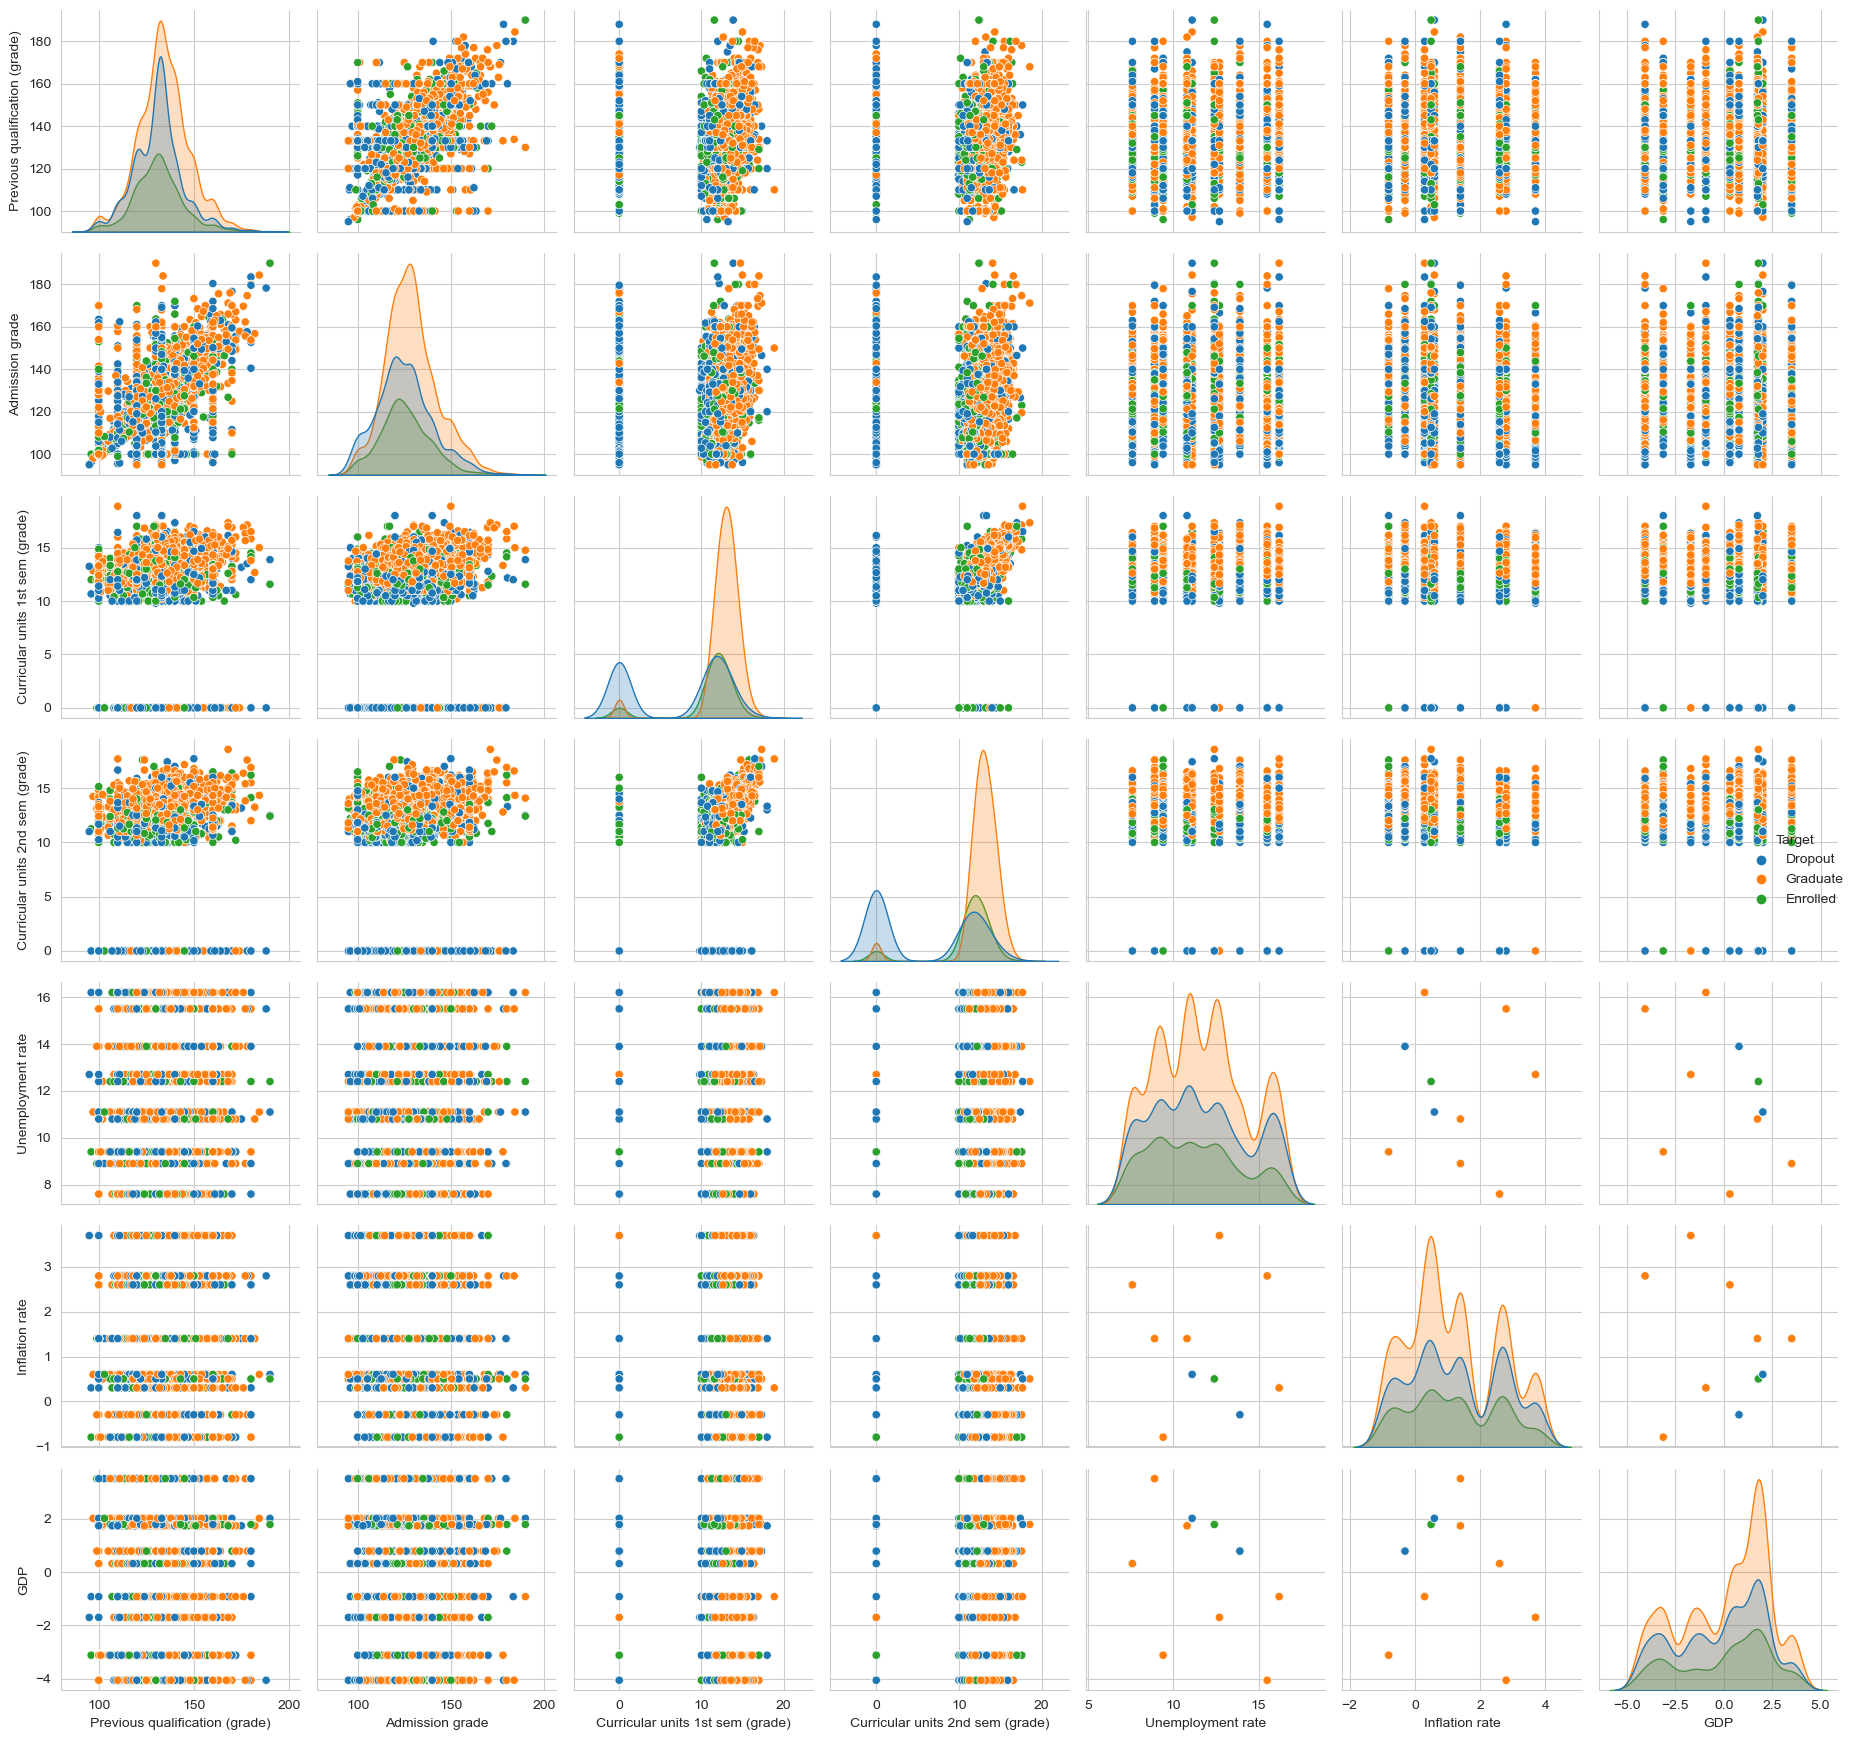

In [15]:
sns.pairplot(corr_df,hue='Target')
plt.tight_layout()
plt.show()

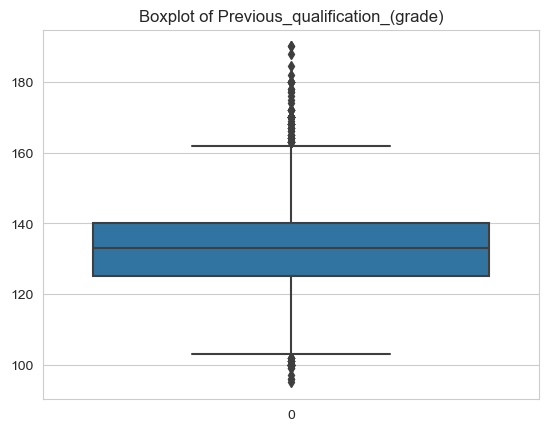

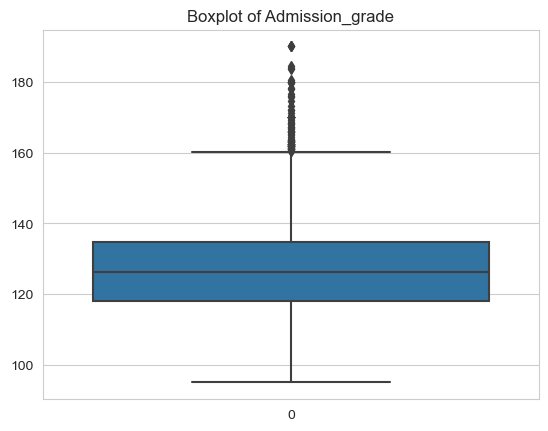

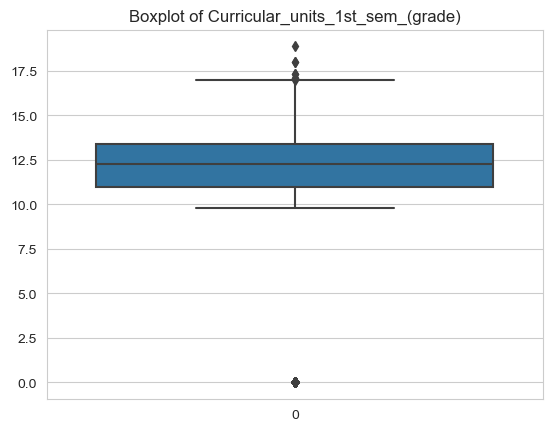

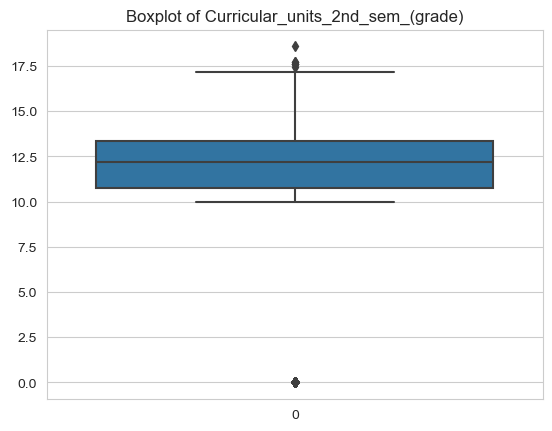

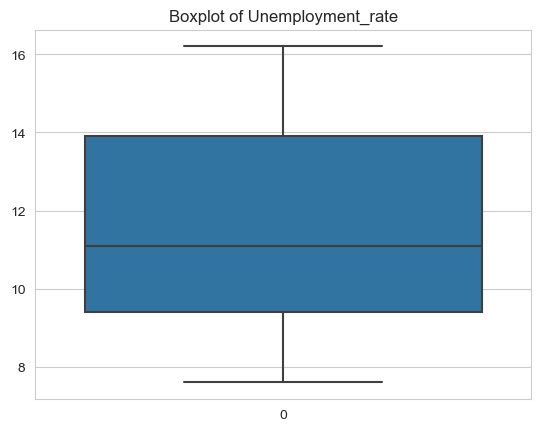

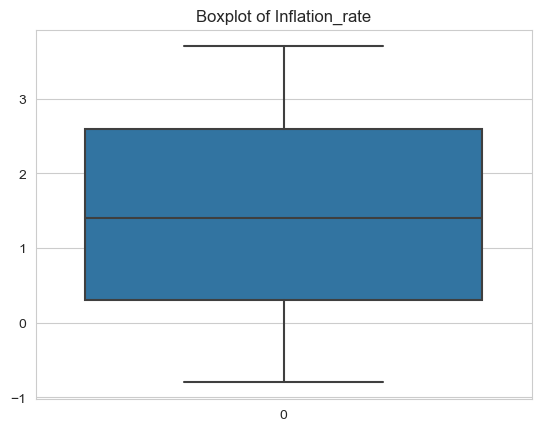

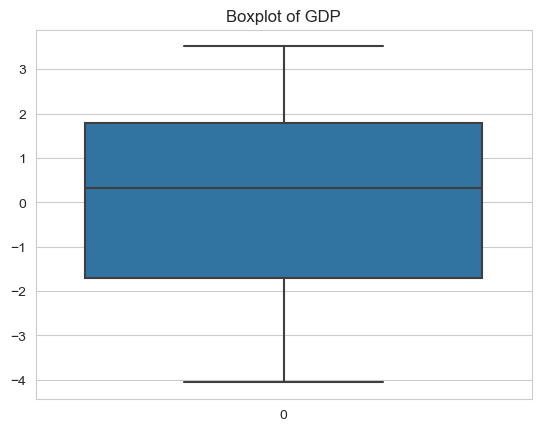

In [16]:
#Checking for the distribution of the numerical columns
for i in df_dist.columns:
    sns.boxplot(df_dist[i])
    plt.title(f'Boxplot of {i}')
    plt.show()          

In [17]:
#Checking for the correlation of the features with the target
cat_df = df.select_dtypes(exclude='float')
dmap= {'Dropout':0,'Graduate':1,'Enrolled':2}
cat_df['Target'] = cat_df['Target'].map(dmap)
cat_df.corr()['Target'].sort_values(ascending=False)

Target                                            1.000000
Curricular units 2nd sem (approved)               0.351135
Tuition fees up to date                           0.342121
Curricular units 1st sem (approved)               0.290243
Curricular units 2nd sem (evaluations)            0.194412
Curricular units 1st sem (evaluations)            0.125278
Scholarship holder                                0.114517
Displaced                                         0.070649
Daytime/evening attendance\t                      0.066439
Curricular units 2nd sem (enrolled)               0.060670
Curricular units 1st sem (enrolled)               0.052020
Mother's occupation                               0.051664
Father's occupation                               0.051455
Application order                                 0.027393
Course                                            0.024210
International                                     0.015893
Educational special needs                         0.0037

In [18]:
cat_df_int = df.select_dtypes(exclude='int')
cat_df_int['Target'] = cat_df_int['Target'].map({'Dropout':0,'Graduate':1,'Enrolled':2})
cat_df_int.corr()['Target']

Previous qualification (grade)      0.025096
Admission grade                     0.038716
Curricular units 1st sem (grade)    0.349652
Curricular units 2nd sem (grade)    0.429214
Unemployment rate                  -0.037279
Inflation rate                     -0.021798
GDP                                 0.037052
Target                              1.000000
Name: Target, dtype: float64

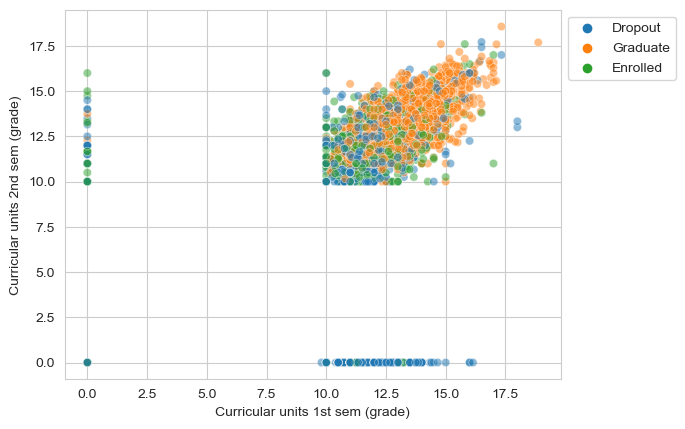

In [19]:
#Using scatterplot to examine the relationship between Curricular units 1st sem(grade) and Curricular units 2nd sem (grade)
sns.scatterplot(data=df,x='Curricular units 1st sem (grade)',y='Curricular units 2nd sem (grade)',hue='Target',alpha=0.5)
plt.legend(loc='best',bbox_to_anchor=(1,1))

There is a dense cluster of students with grades in the range of 10 to 15 for both semesters. These students are spread across all three statuses (Dropout, Graduate, and Enrolled), but a larger proportion are Graduates. This suggests that moderate performance does not preclude graduation, but there is still some risk of dropout. Students who dropped out tend to have lower grades overall, particularly concentrated in the 0-10 range for both semesters. This suggests that poor academic performance might be a significant factor in students deciding (or being forced) to drop out. A small number of students have a grade of 0 in one or both semesters. These students are almost exclusively Dropouts, indicating that failing or not completing courses in one or both semesters is a strong predictor of dropping out. Monitoring students' performance early on, particularly after the first semester, could help in identifying those at risk of dropping out. Targeted interventions could be made to support these students.

# EXPLORATORY DATA ANALYSIS (EDA)


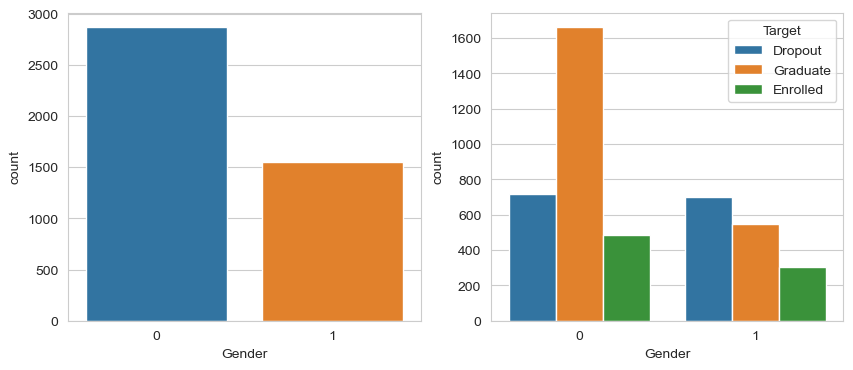

<Figure size 500x600 with 0 Axes>

In [20]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
sns.countplot(data=df,x='Gender',ax=ax[0])

plt.figure(figsize = (5,6))
sns.countplot(data=df,x='Gender',hue='Target',ax=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.show()

The count plot shows that we have male =1 and female = 0. There is a high proportion of female students compared to male. Despite the higher total number of female students, dropout rates are similar for both genders, indicating that the risk factors for dropping out are comparable. However, female students have the highest number of graduates, suggesting that they are more likely to complete their studies successfully. This could reflect effective support systems for female students or better overall academic performance

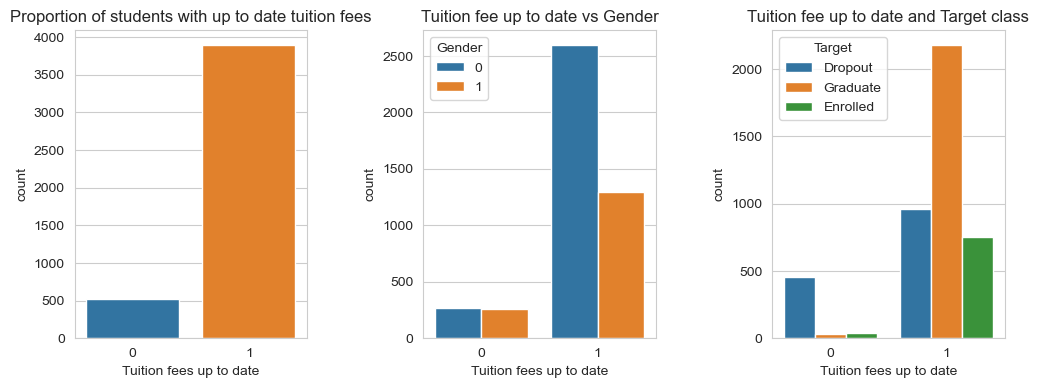

In [21]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
sns.countplot(data=df,x='Tuition fees up to date',ax=ax[0])
plt.subplots_adjust(wspace=0.5)
ax[0].set_title('Proportion of students with up to date tuition fees')

#plt.figure(figsize = (8,6))
sns.countplot(data=df,x='Tuition fees up to date',hue='Gender',ax=ax[1])
plt.subplots_adjust(wspace=0.5)
ax[1].set_title('Tuition fee up to date vs Gender')

#plt.figure(figsize = (8,6))
sns.countplot(data=df,x='Tuition fees up to date',hue='Target',ax=ax[2])
ax[2].set_title('Tuition fee up to date and Target class')
plt.subplots_adjust(wspace=0.5)
plt.show()

There is a low proportion of student whose tuition fees are not up to date. The proportion of student that has updated tuition fees are higher compared to males. However, there is equal number of for both gender in relation to students that does not have updated tuition fees. Student who graduated has update tuition fee. There is also increased number of dropout student with not up to date tuition fee.

The observation that students who graduated tend to have updated tuition fees suggests a strong correlation between financial responsibility and academic success.Also, he fact that both genders have an equal number of students with overdue tuition fees suggests that financial challenges are not disproportionately affecting one gender over the other. This equality in financial difficulties might indicate that the underlying reasons for tuition delays are similar for both male and female students.
he higher proportion of students with updated tuition fees being female suggests that female students may be more financially responsible or better supported in managing their tuition payments. This financial responsibility could be a contributing factor to the higher graduation rates observed among female students

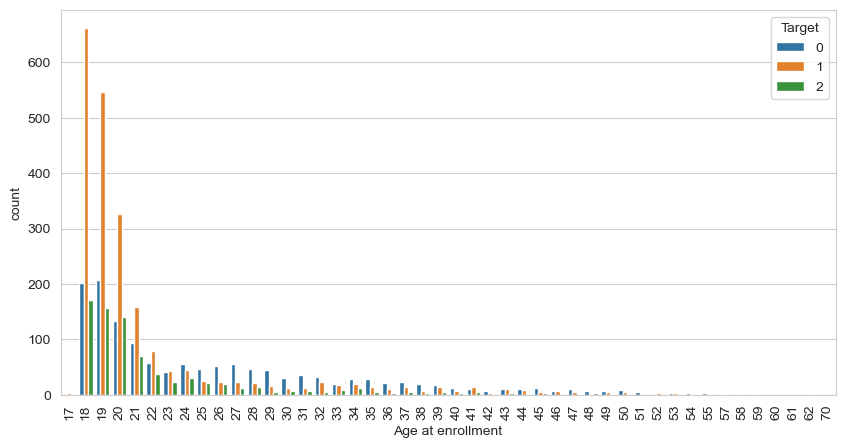

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=cat_df,x='Age at enrollment',hue='Target')
plt.xticks(rotation=90);

As the Age increases from 17 to 70, the rate of graduation decreases and the rate of dropout compared to graduates increases. The trend of decreasing graduation rates and increasing dropout rates with age suggests that older students may face more significant challenges in completing their education. These challenges could be due to various factors such as family responsibilities, full-time employment, or health issues that become more prevalent as students get older. The higher graduation rates among younger students (e.g., those around 17-24 years old) may indicate that they are better able to manage the demands of higher education. Younger students might have fewer external responsibilities and more recent academic preparation, contributing to their higher success rates.

<Axes: xlabel='International', ylabel='count'>

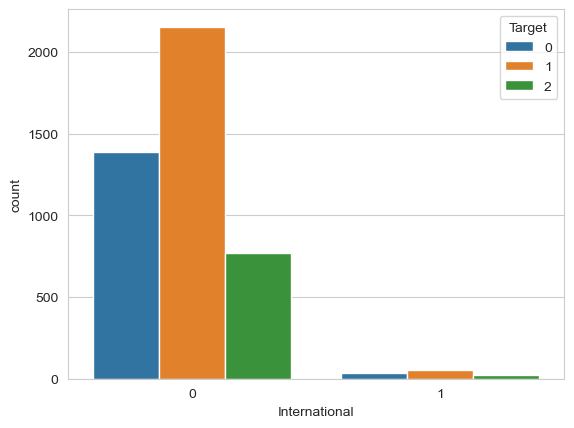

In [23]:
sns.countplot(data=cat_df,x='International',hue='Target')

There are few number of international student. 

<Axes: xlabel='Course', ylabel='count'>

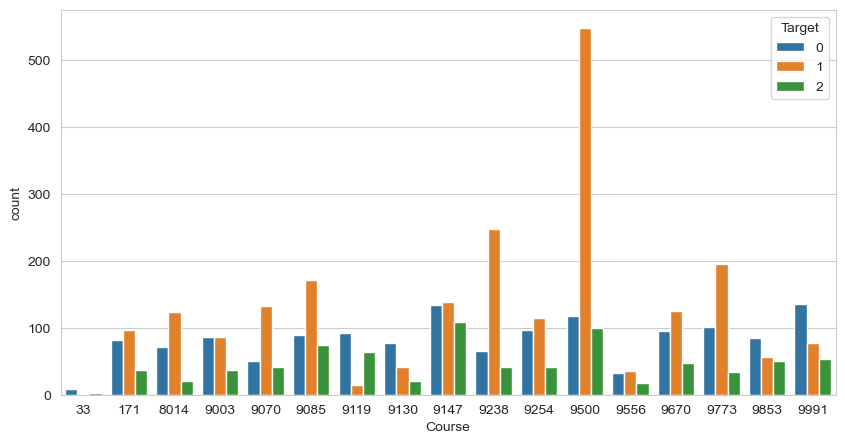

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=cat_df,x='Course',hue='Target')

33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)

Nursing has the highest number of graduate while Management(evening attendance) had the highest number of dropout.

<Axes: xlabel='Scholarship holder', ylabel='count'>

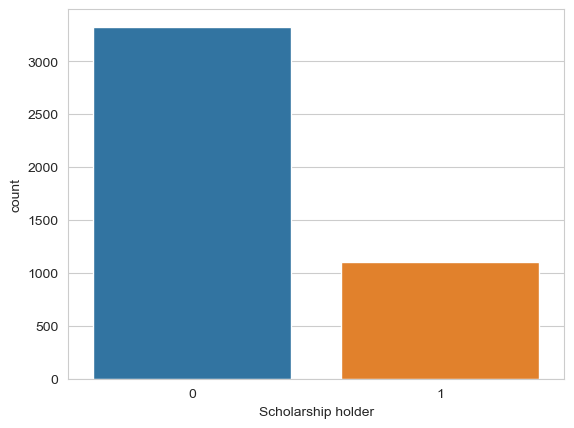

In [25]:
sns.countplot(data=cat_df,x='Scholarship holder')

<Axes: xlabel='Daytime/evening attendance\t', ylabel='count'>

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


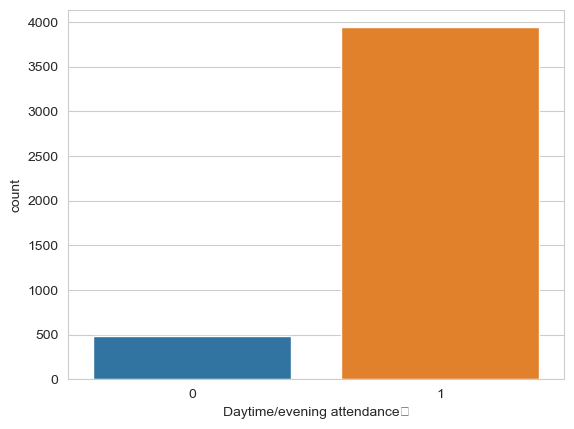

In [26]:
sns.countplot(data=cat_df,x='Daytime/evening attendance\t')

1 = daytime 0=evening 

In [27]:
df['Unemployment rate']

0       10.8
1       13.9
2       10.8
3        9.4
4       13.9
        ... 
4419    15.5
4420    11.1
4421    13.9
4422     9.4
4423    12.7
Name: Unemployment rate, Length: 4424, dtype: float64

<Axes: xlabel='Daytime/evening attendance\t', ylabel='count'>

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


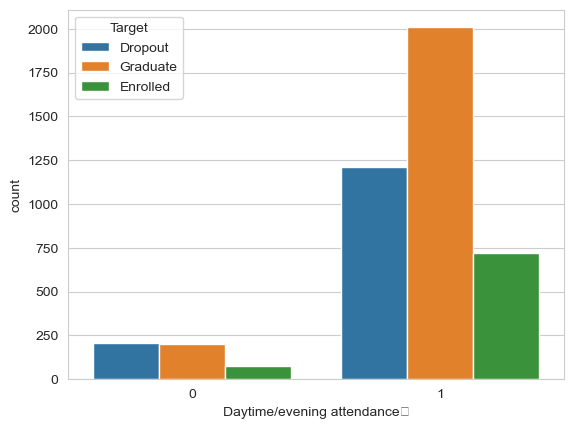

In [28]:
sns.countplot(data=df,x='Daytime/evening attendance\t',hue='Target')

In [29]:
df.Nacionality.value_counts().head(10)

Nacionality
1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
Name: count, dtype: int64

In [30]:
columns= ['Previous_qualification_(grade)', 'Admission_grade','Curricular_units_1st_sem_(grade)', 'Curricular_units_2nd_sem_(grade)']

In [31]:
for col in columns:
    q1 = df_dist[col].quantile(0.25)
    q3 = df_dist[col].quantile(0.75)
    low = q1 - 1.5 * (q3 - q1)
    upper = q3 + 1.5 * (q3 - q1)
    print(f'{col} - Lower bound: {low}, Upper bound: {upper}')
    upper_outliers = df_dist[df_dist[col] > upper][col].count()
    lower_outliers = df_dist[df_dist[col] < low][col].count()
    print(f'{col} - Number of upper outliers: {upper_outliers}')
    print(f'{col} - Number of lower outliers: {lower_outliers}')

Previous_qualification_(grade) - Lower bound: 102.5, Upper bound: 162.5
Previous_qualification_(grade) - Number of upper outliers: 86
Previous_qualification_(grade) - Number of lower outliers: 93
Admission_grade - Lower bound: 92.55, Upper bound: 160.15000000000003
Admission_grade - Number of upper outliers: 86
Admission_grade - Number of lower outliers: 0
Curricular_units_1st_sem_(grade) - Lower bound: 7.3999999999999995, Upper bound: 17.0
Curricular_units_1st_sem_(grade) - Number of upper outliers: 8
Curricular_units_1st_sem_(grade) - Number of lower outliers: 718
Curricular_units_2nd_sem_(grade) - Lower bound: 6.8750000049999995, Upper bound: 17.208333325
Curricular_units_2nd_sem_(grade) - Number of upper outliers: 7
Curricular_units_2nd_sem_(grade) - Number of lower outliers: 870


#median_value = df_dist[col].median()
#df_dist.loc[(df_dist[col] < low) | (df_dist[col] > upper), col] = median_value

We can choose to replace the outliers with the median values however these are students grades and they may be reflective of the student's performance in the test or admission examination.

<Axes: xlabel='Admission grade', ylabel='Count'>

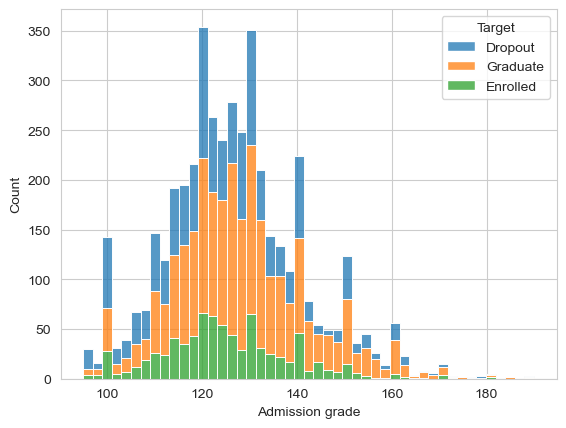

In [32]:
sns.histplot(data=df,x='Admission grade',hue='Target',multiple='stack')

The majority of students have admission grades between 100 and 160. As indicated by the peak in the histogram, a significant concentration of students have grades between 110 and 130.
Most students have admission grades in the 120-130 range. This range is crucial because it has a high concentration of graduates and dropouts, suggesting that students with these grades are at a pivotal point where various factors might determine their academic outcomes. Students with lower admission grades (around 100-110) tend to have a higher dropout rate. This suggests that students with lower grades might struggle more academically, leading to higher dropout rates. As admission grades increase beyond 140, dropouts decrease sharply, and outcomes become more stable (primarily graduates). This suggests that higher admission grades may correlate with better academic performance and more successful outcomes


<Axes: xlabel='Previous qualification (grade)', ylabel='Count'>

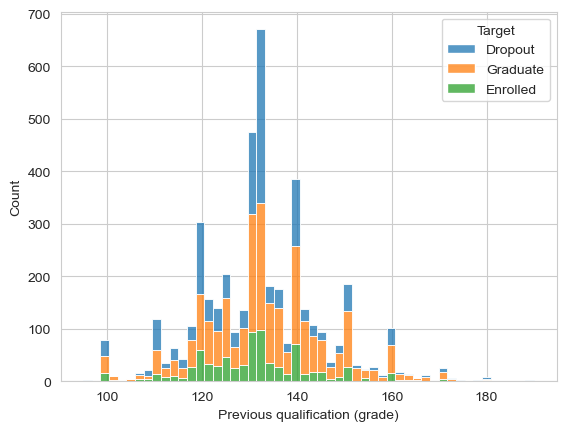

In [33]:
sns.histplot(data=df, x='Previous qualification (grade)',hue='Target',multiple='stack')

The majority of students have previous qualification grades between 120 and 140. This range shows a significant distribution of outcomes, with a mix of graduates, dropouts, and enrolled students. There is a notable peak in dropouts (blue bars) around the 130-140 grade range. This suggests that even students with relatively high previous qualification grades are at risk of dropping out. This could point to factors beyond prior academic performance, such as personal circumstances or challenges faced during their current studies. Graduates (orange bars) are more evenly distributed across the 120-140 grade range but seem to peak around 130 and slightly above. This indicates that students with prior qualifications in this range are more likely to graduate, possibly because they have a solid academic foundation. The chart shows a significant number of dropouts among students with lower previous qualification grades (around 110-120). These students might be at a higher risk of academic struggles, leading to increased dropout rates. For students with previous qualification grades around 140 and above, outcomes appear more stable, with fewer dropouts and a higher likelihood of graduation. This suggests that students with higher previous qualifications are generally better equipped to succeed in their current programs.

In [34]:
df_dist.describe()

,Previous_qualification_(grade),Admission_grade,Curricular_units_1st_sem_(grade),Curricular_units_2nd_sem_(grade),Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,10.640822,10.230206,11.566139,1.228029,0.001969
std,13.188332,14.482001,4.843663,5.210808,2.663850,1.382711,2.269935
min,95.000000,95.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,11.000000,10.750000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,12.285714,12.200000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,13.400000,13.333333,13.900000,2.600000,1.790000
max,190.000000,190.000000,18.875000,18.571429,16.200000,3.700000,3.510000


In [35]:
#df.groupby('Target')['Curricular units 1st sem (grade)'].count()

In [36]:
df.groupby('Target')['Curricular units 1st sem (grade)'].count()

Target
Dropout     1421
Enrolled     794
Graduate    2209
Name: Curricular units 1st sem (grade), dtype: int64

In [39]:
print(len(df[df['Target']=='Dropout']))
print(len(df[(df['Curricular units 1st sem (grade)']==0.0) & (df['Target']=='Dropout')]))

1421
570


There were 1421 student that dropped out and 570 students got 0 in their 1st sem(grade) that eventually dropped out